imports and prepare data

In [265]:
from sklearn import tree

In [266]:
from functions import *
from split_to_series import *
from build_boards_to_files import *
from sklearn.model_selection import train_test_split

In [267]:
SIZE = 5
AMOUNT_BOARDS = 10000
AMOUNT_MOVES = 100
NUM_DICT = 1
IGNORE_RANGE = 5

In [268]:
def split_boards(boards, amount, ignore_range, amount_board_in_series):
        if len(boards)>ignore_range:
                boards = boards[ignore_range:]
                if boards[amount - ignore_range - 1]  in boards[:amount-ignore_range-1]: # there is loop
                        boards, amount  = delete_repeat(boards, len(boards))
                #after we delete the repeat boards, we split the board to series
                return [(boards[i:i + amount_board_in_series]) for i in range(len(boards) - amount_board_in_series + 1)]
        else:
                return []

In [269]:
def split_board_to_series(size, amount_boards, amount_moves, num_dict, amount_board_in_series, ignore_range):
    series = []
    for i in range(amount_boards):
        print_numbers(i)

        # path to read
        path_file = path(size, i, amount_moves, num_dict, amount_boards)
        # read the file
        boards_game, amount_boards_of_game = read_file_to_list(path_file, size * size)
        
        splited_boards = split_boards(boards_game, amount_boards_of_game, ignore_range, amount_board_in_series)
        series += splited_boards
    return series

In [270]:
gen = 2
name_df = f'{PATH_DF}\\{SIZE}-{AMOUNT_BOARDS}\\{SIZE}size_{AMOUNT_BOARDS}boards_{gen}gen_non-reverse'
data = pd.read_pickle(f'{name_df}.pkl')

In [274]:
new_columns = [f'Col_{i}' for i in range(1, gen*SIZE*SIZE + 1)]
data_sort = data.sort_values(by = new_columns).reset_index(drop=True)
for i in data_sort.columns:
    data_sort[i] = data_sort[i].astype(int)

In [283]:
amount_features = len(data_sort.columns) - SIZE*SIZE #the previous boards
features = data_sort.iloc[:, :amount_features]
name_col = 'Col_' + str(amount_features + 1)  # Target: the first pixel in the board
target = data_sort[name_col]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=365)


In [285]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

26784
26784
2976
2976


In [286]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)

print(dt.tree_.node_count, dt.tree_.max_depth)
train_test_full_error

639 12


,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0


In [287]:
dt.tree_

In [288]:
dec_tree(X_train,y_train, X_test, y_test, 9 ,42)

597 9


(DecisionTreeClassifier(max_depth=9, random_state=42),
               train      test
 accuracy   0.992981  0.993280
 precision  0.983215  0.987368
 recall     0.995261  0.991543
 f1         0.989202  0.989451)

In [289]:
import pickle
import json

In [290]:
# pickle.dumps(dt,)
# json.dumps()

In [291]:
def dec_tree(X_train,y_train, X_test, y_test, md ,rs):
    """_summary_

    Args:
        X_train (list): 
        y_train (list): 
        X_test (list): 
        y_test (list): 
        md (int): max depth
        rs (int): random state
    """
    dt = tree.DecisionTreeClassifier(max_depth = md, random_state=rs)
    dt = dt.fit(X_train, y_train)

    # The error on the training and test data sets
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                    measure_error(y_test, y_test_pred, 'test')],
                                    axis=1)

    return dt, dt.tree_.node_count, dt.tree_.max_depth, train_test_full_error

In [292]:
dt, node_count, max_depth, train_test_full_error = dec_tree(X_train,y_train, X_test, y_test, 10, 42)
print(dt)
print(node_count, max_depth)
print(train_test_full_error)

DecisionTreeClassifier(max_depth=10, random_state=42)
621 10
              train      test
accuracy   0.996154  0.997312
precision  0.993306  0.995772
recall     0.994799  0.995772
f1         0.994052  0.995772


In [293]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(df, file)

In [294]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [295]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_full_error

,train,test
accuracy,0.996154,0.997312
precision,0.993306,0.995772
recall,0.994799,0.995772
f1,0.994052,0.995772


In [296]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dt, node_count, max_depth, train_test_full_error  = dec_tree(X_train,y_train, X_test, y_test, i, 42)
    
    name_file = f"{PATH_MODELS}\\forward_model\\{SIZE}\\decision_tree_size{SIZE}_model_{str(i)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    
    print(node_count, max_depth)
    print(train_test_full_error)

31 4
              train      test
accuracy   0.725956  0.737567
precision  0.601863  0.612551
recall     0.447989  0.474630
f1         0.513650  0.534842
63 5
              train      test
accuracy   0.734058  0.746976
precision  0.670305  0.694165
recall     0.347781  0.364693
f1         0.457956  0.478170
123 6
              train      test
accuracy   0.763217  0.775874
precision  0.679851  0.690834
recall     0.504623  0.533827
f1         0.579276  0.602266
227 7
              train      test
accuracy   0.794093  0.805780
precision  0.692430  0.699134
recall     0.652335  0.682875
f1         0.671785  0.690909
393 8
              train      test
accuracy   0.872760  0.861223
precision  0.803753  0.777894
recall     0.801896  0.788584
f1         0.802823  0.783202
597 9
              train      test
accuracy   0.992981  0.993280
precision  0.983215  0.987368
recall     0.995261  0.991543
f1         0.989202  0.989451
621 10
              train      test
accuracy   0.996154  0.997312

In [297]:
name_file = f"{PATH_MODELS}\\forward_model\\{SIZE}\\decision_tree_size{SIZE}_model_10.pkl"
with open(name_file, 'rb') as file:
    loaded_model = pickle.load(file)
tree_text = tree.export_text(loaded_model)
print("Decision Tree Structure:\n", tree_text)

Decision Tree Structure:
 |--- feature_0 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_21 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  0.50
|   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_24 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |--- f

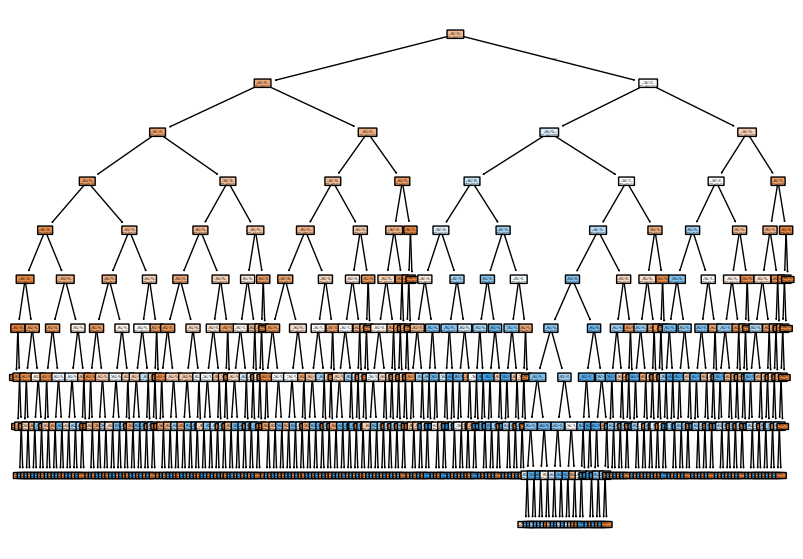

In [298]:
plt.figure(figsize=(10, 7))
tree.plot_tree(loaded_model, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

In [299]:
y_train_pred = loaded_model.predict(X_train)
y_test_pred = loaded_model.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
print(node_count, max_depth)
train_test_full_error

639 12


,train,test
accuracy,0.996154,0.997312
precision,0.993306,0.995772
recall,0.994799,0.995772
f1,0.994052,0.995772
